In [1]:
import sys
import os
sys.path.append('./src')
os.chdir(os.path.dirname(sys.path[0]))



# data Analysis 
import geopandas as gpd
import pandas as pd
import numpy as np



# plot
import matplotlib.pyplot as plt
import gc

# output
from output_image import write_output, analyze_model_result, output_to_csv


# multiprocessing
import multiprocessing
import brun


# model
from school_model import School

# spreadsheets
# import spreadsheets

#config
import configparser
import warnings
warnings.filterwarnings("ignore")

# Parameter Setup
Here using a test trial small schedule with 5 steps of class per day
<br>
Run for 15 days

In [2]:

#change this to map path on comet later
map_path = "./layouts/schoollayout1/schoollayout1_processed.shp"
schedule_path = "./schedule_data/day_schedule.csv" #small schedule has only 5 steps per day for testing purposes
#full day schedule should be "day_schedule.csv" 
schedule_steps = 90 # full day_schedule steps should be 90


# if you wish to use google sheet parameter input, you'll have to follow instructions for getting credentials of the sheet api
# follow the first two steps in:
# https://developers.google.com/sheets/api/quickstart/python
# and save your credentials in the src folder as listed below
SHEET_URL = 'https://docs.google.com/spreadsheets/d/1Quyyey5B_kdQK1_OU0OkIDGZE27tuUfjZ6hCsV99-sM'
credentials = './src/credentials.json'


# two types of parameter setups available for batchrunner
# pre-setup for fixed/variable parameter dictionaries (consistant with mesa batchrunner)
######################
grade_N = 350
KG_N = 50
preschool_N = 50
special_education_N = 10
faculty_N = 40
seat_dist = 5
mask_prob = 0.516
days = 15
max_steps = days*schedule_steps
iterations = 1
####################

In [3]:
# fixed parameters are model input parameters that are static for all batch running jobs
fixed_parameters = {}


fixed_parameters['grade_N'] = grade_N
fixed_parameters['KG_N'] = KG_N
fixed_parameters['preschool_N'] = preschool_N
fixed_parameters['special_education_N'] = special_education_N
fixed_parameters['faculty_N'] = faculty_N
fixed_parameters['seat_dist'] = 5
fixed_parameters['init_patient'] = 3
#fixed_parameters['mask_prob'] = 0.5

# same logic as fixed parameters, only these will be batch ran for all combinations 
variable_parameters = {}
variable_parameters['student_testing_freq'] = [7, 14]
variable_parameters['attend_rate'] = [0.75, 1]
variable_parameters['inclass_lunch'] = [True, False]
variable_parameters['mask_prob'] = [0, 0.5, 1]

In [4]:
# dataframe parameter setup that can port with google sheet
# TODO: currently the sheet script cannot retrieve boolean values so this input method is not fully functioning
# namely inclass_lunch
# google sheet is currently not in use

#param_df = spreadsheets.return_params_df(sheet_url=SHEET_URL, credentials=credentials)

# Single Run

In [5]:
%%time
school = School(map_path, schedule_path, grade_N, KG_N, preschool_N, special_education_N, 
                 faculty_N, seat_dist, init_patient=3, attend_rate=1, mask_prob=0.5, inclass_lunch=False)


while school.running and school.schedule.steps < max_steps:
    school.step()

params = "{'test': 0}" 
agent_df = school.datacollector.get_agent_vars_dataframe()
model_df = school.datacollector.get_model_vars_dataframe()

Wall time: 29min


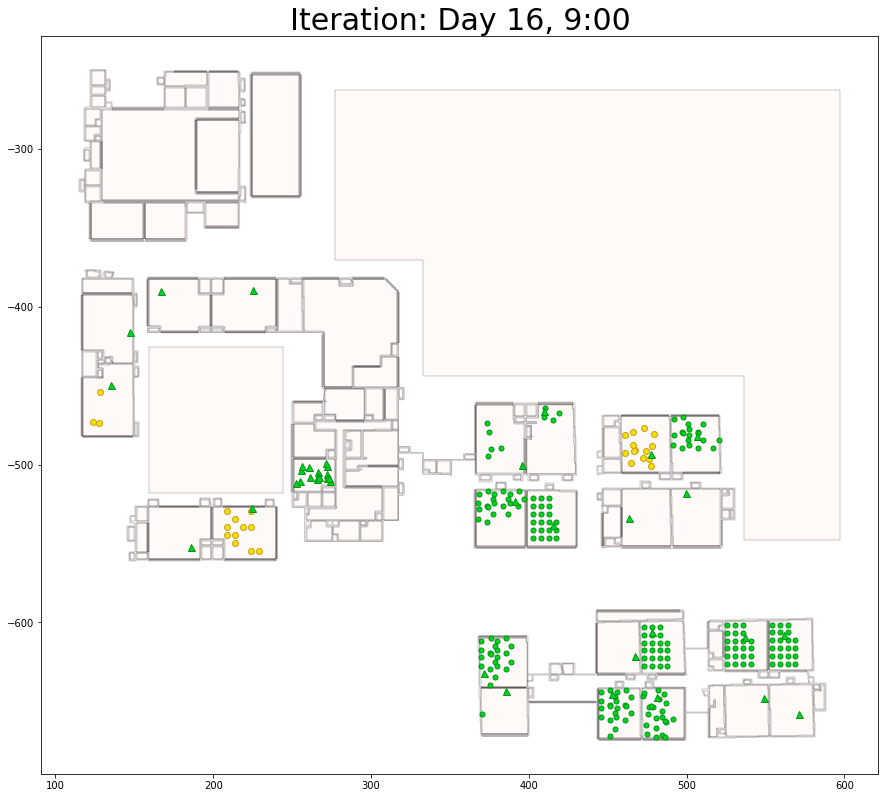

In [6]:
school.show()

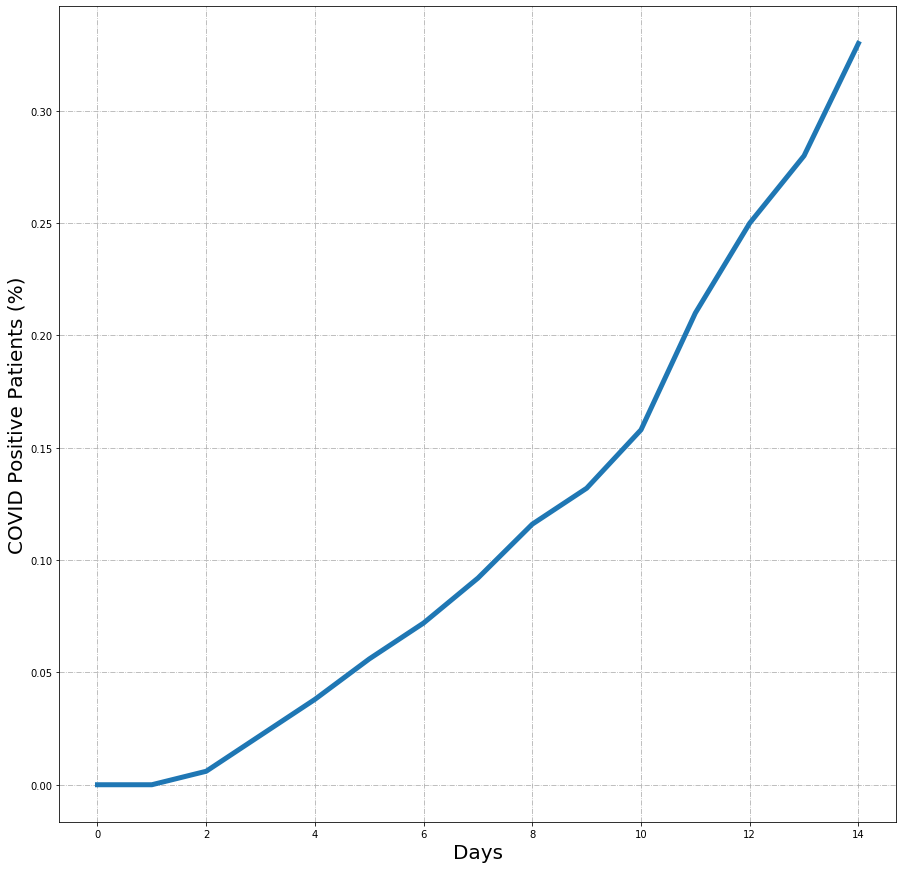

In [7]:
analyze_model_result(model_df=model_df) 

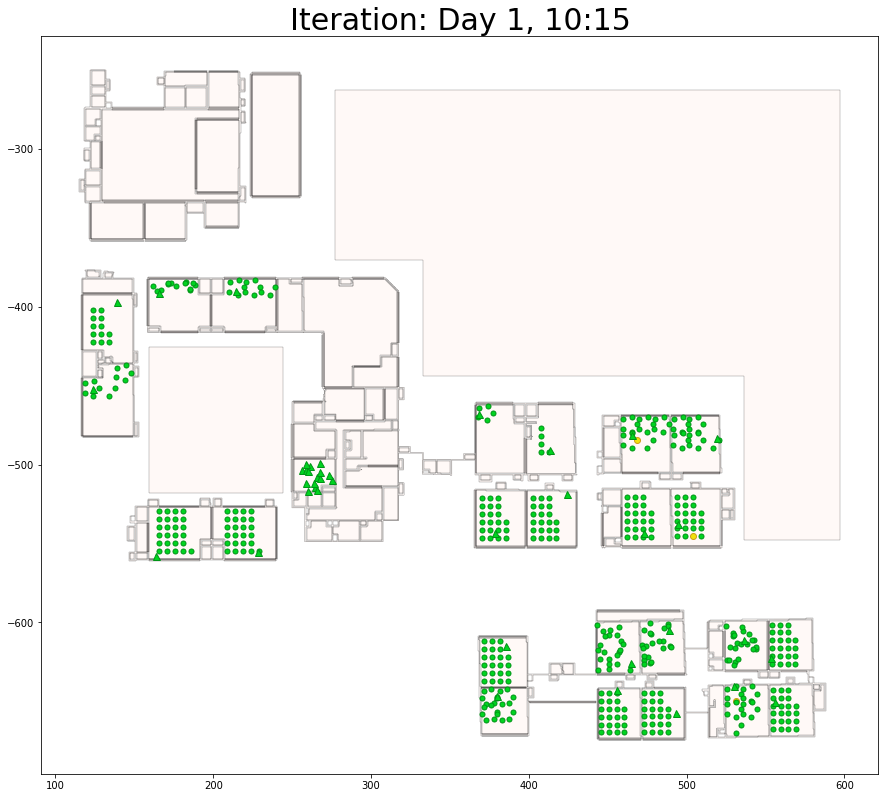

In [16]:
school.show()

In [17]:
analyze_model_result(model_df=model_df) 

NameError: name 'model_df' is not defined

# Multiprocessing Run

In [4]:
%%time
if __name__ ==  '__main__': 
    # for more on multiprocessing, check src/brun 
    batchrunner = brun.BatchrunnerMP(model=School, 
                                     map_path=map_path,
                                     schedule_path=schedule_path,
                                     max_steps=max_steps, 
                                     iterations=iterations, 
                                     fixed_parameters=fixed_parameters, 
                                     variable_parameters=variable_parameters)
    results = batchrunner.run_all()

Your system has 8 available processors.
Wall time: 2h 3min 48s


In [5]:
for params, dfs in results.items():
    #write_output(params, dfs, map_path)
    output_to_csv(params, dfs,  username='geoact')

In [7]:
np.mean([])

nan

# Simulation Result

In [ ]:
model_out_df = pd.read_csv("/oasis/scratch/comet/jleiucsd/temp_project/output_seat_dist_12_init_patient_3_attend_rate_1_inclass_lunch_True_mask_prob_0.75_iteration_0/model_val.csv")

In [ ]:
analyze_model_result(model_df=model_df) 